In [14]:
!pip install gurulearn > /dev/null 2>&1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import librosa, librosa.display
from tqdm import tqdm
import tensorflow as tf
from gurulearn import AudioRecognition

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATADIR = '/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Sachini DOC'

In [4]:
%cd '/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Sachini DOC'

/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Sachini DOC


In [5]:
data = tf.keras.utils.audio_dataset_from_directory(DATADIR)

Found 255 files belonging to 5 classes.


In [6]:
x, sr = librosa.load(r"/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Sachini DOC/Patient's Fluent Respond/ElevenLabs_2024-11-19T21_59_10_Grandpa Spuds Oxley_pvc_s50_sb75_se0_b.wav")
print(sr)

22050


In [7]:
import os
for dirname, _, filenames in os.walk(DATADIR):
    for filename in filenames:
        os.path.join(dirname, filename)

In [8]:
CATEGORIES = data.class_names

In [9]:
CATEGORIES

["Patient's Confused Respond",
 "Patient's Delay Respond ",
 "Patient's Fluent Respond",
 "Patient's Minimum respond",
 "Patient's Repeat respond"]

In [10]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for audio in os.listdir(path):
            audio_array, sr_array=librosa.load(os.path.join(path,audio))
            audio_array = audio_array[0:20765]
            if audio_array.shape[0] == 20765:
              training_data.append([audio_array,class_num])
create_training_data()

In [15]:
model = AudioRecognition()

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.2214 - loss: 3.5770 - val_accuracy: 0.2256 - val_loss: 2.2850 - learning_rate: 9.7812e-04
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.2178 - loss: 3.1006 - val_accuracy: 0.1829 - val_loss: 2.2943 - learning_rate: 9.5671e-04
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2485 - loss: 2.8648 - val_accuracy: 0.1707 - val_loss: 2.3062 - learning_rate: 9.3578e-04
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2335 - loss: 2.8790 - val_accuracy: 0.1707 - val_loss: 2.2847 - learning_rate: 9.1530e-04
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.1817 - loss: 2.6870 - val_accuracy: 0.1707 - val_loss: 2.2884 - learning_rate: 8.9527e-04
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2203 - loss: 2.5504 - val_accuracy: 0.1707 - val_loss: 2.2767 - learning_rate: 8.7568e-04
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2255 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


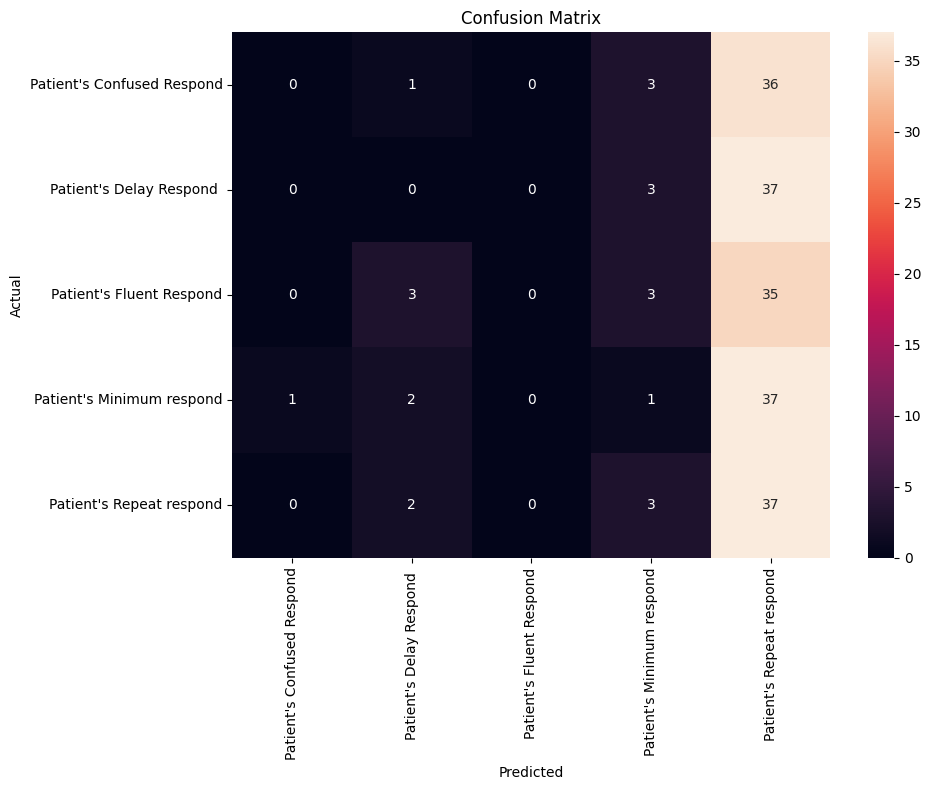

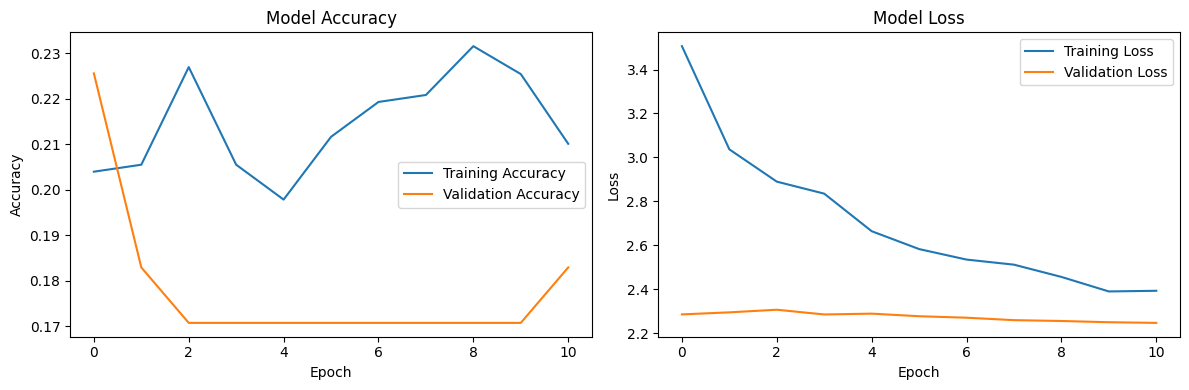

In [16]:
model.audiotrain(DATADIR, epochs=100)

In [17]:
model_url="model_folder"

In [18]:
prediction = model.predict(model_dir=model_url,input_wav="/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Sachini DOC/Patient's Minimum respond/ElevenLabs_2024-11-19T21_59_43_Grandpa Spuds Oxley_pvc_s50_sb75_se0_b.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


In [20]:
conf=model.predict_class_conf(model_dir=model_url,input_wav="/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Sachini DOC/Patient's Delay Respond /ElevenLabs_2024-11-19T22_27_51_River_pre_s50_sb75_se0_b.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [21]:
prediction

"Patient's Repeat respond"

In [22]:
def predict_sound(wav_file_path):
  if not wav_file_path.lower().endswith('.wav'):
    plt.title("This is not wav file", size=18, color='red')
  else:
    prediction = model.predict(model_dir=model_url,input_wav=wav_file_path)
    conf=model.predict_class_conf(model_dir=model_url,input_wav=wav_file_path)
    audio, sr = librosa.load(wav_file_path, sr=None)

    if conf >= 0.2:
      plt.figure(figsize=(12, 6))
      librosa.display.waveshow(audio, sr=sr)
      plt.title("Prediction - {}".format(str(prediction)), size=18, color='green')
      plt.xlabel('Time (s)')
      plt.ylabel('Amplitude')
      plt.show()
    else:
      plt.title("Not Detected", size=18, color='red')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


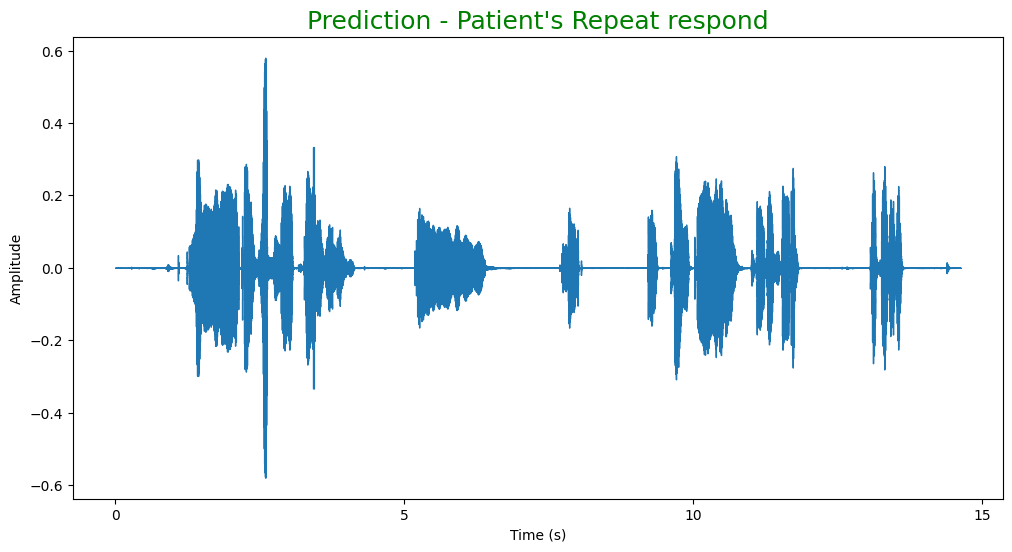

In [23]:
predict_sound("/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Sachini DOC/Patient's Delay Respond /ElevenLabs_2024-11-19T22_27_51_River_pre_s50_sb75_se0_b.wav")

Saving ElevenLabs_2024-11-19T22_13_17_Brian_pre_s50_sb75_se0_b.wav to ElevenLabs_2024-11-19T22_13_17_Brian_pre_s50_sb75_se0_b.wav
Valid .wav file uploaded: ElevenLabs_2024-11-19T22_13_17_Brian_pre_s50_sb75_se0_b.wav


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


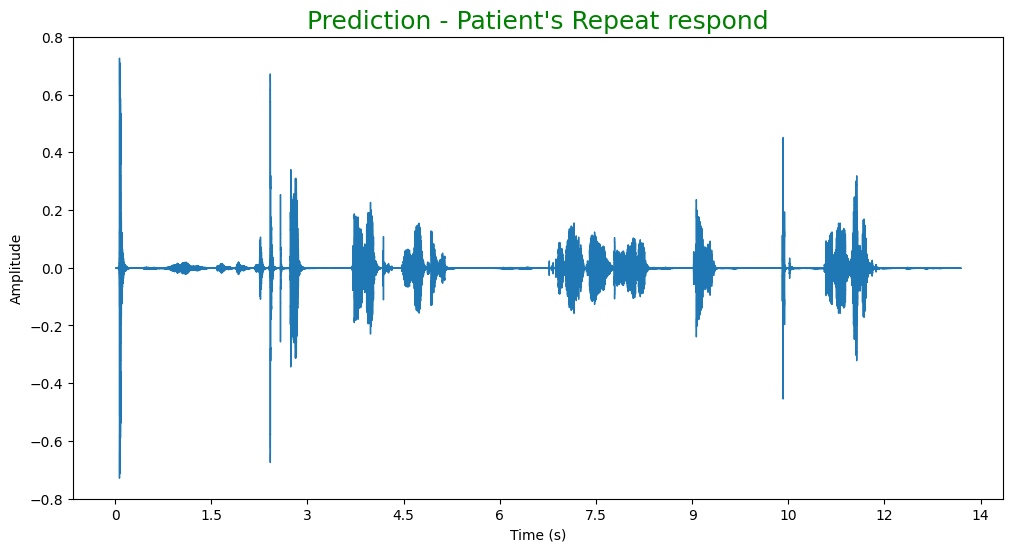

In [24]:
from google.colab import files

def is_wav_file(filename):
    return filename.lower().endswith('.wav')

uploaded = files.upload()

for filename in uploaded.keys():
    if is_wav_file(filename):
        print(f'Valid .wav file uploaded: {filename}')
        predict_sound(filename)
    else:
        print(f'Invalid file type: {filename}. Please upload only .wav files.')